In [1]:
from sklearn import linear_model as lm
import pandas as pd
import torch
pd.set_option('display.max_columns', None)
from sklearn import datasets
import matplotlib.pyplot as plt
import tensorflow as tf
import torch.nn as nn
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.python.client import device_lib 
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostRegressor
import numpy as np
from sklearn.naive_bayes import MultinomialNB     # 从sklean.naive_bayes里导入朴素贝叶斯模型
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB


import tensorflow as tf

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]='2'# 只显示 Error
import warnings
warnings.filterwarnings("ignore")
from random import seed
import numpy as np
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

In [2]:
def rmse(predicted, actual):
    return np.sqrt(np.mean((actual - predicted)**2))

# 1. 数据及其分布

### 1.1:  v+, v-, vv

<AxesSubplot:xlabel='v+ ', ylabel='Density'>

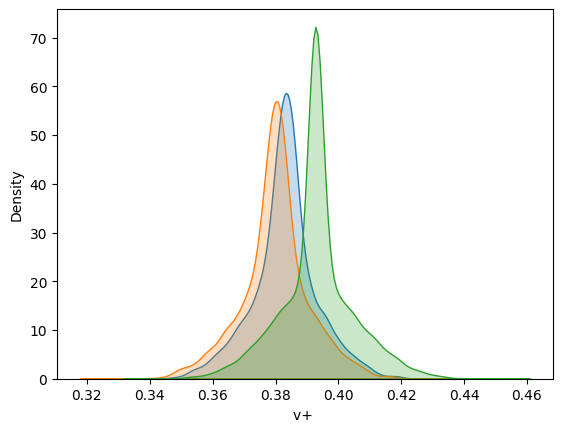

In [19]:
sns.kdeplot(data.iloc[:,1], shade=True)
sns.kdeplot(data.iloc[:,2], shade=True)
sns.kdeplot(data.iloc[:,3], shade=True)

### 1.2: R1, R2, 完全重合

<AxesSubplot:xlabel='R1 ', ylabel='Density'>

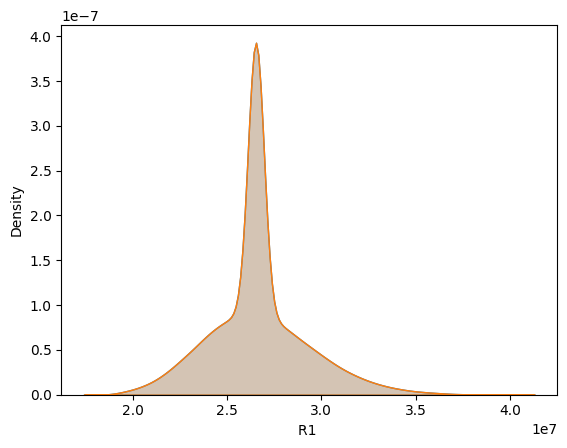

In [20]:
sns.kdeplot(data.iloc[:,4], shade=True)
sns.kdeplot(data.iloc[:,5], shade=True)

### 1.3: R3

<AxesSubplot:xlabel='R3 ', ylabel='Density'>

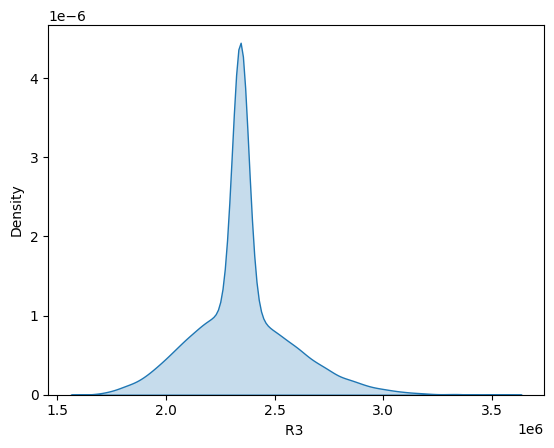

In [21]:
sns.kdeplot(data.iloc[:,6], shade=True)

### 1.4：I3(nA)

<AxesSubplot:xlabel='I3(nA)', ylabel='Density'>

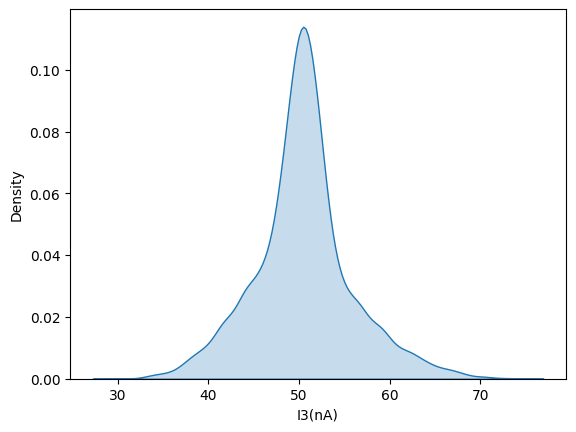

In [22]:
sns.kdeplot(data.iloc[:,7], shade=True)

### 1.5: 我们应该调整该数据嘛？（R2/R1)

<AxesSubplot:xlabel='R2/R1', ylabel='Density'>

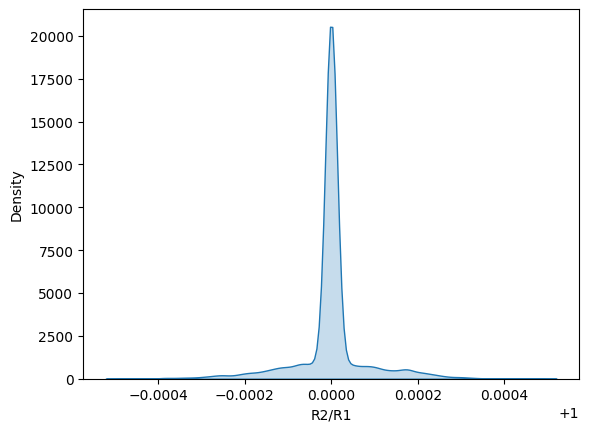

In [23]:
sns.kdeplot(data.iloc[:,8], shade=True)

### 1.6 这是R3/R1 和 R2/R1, 完全重合

<AxesSubplot:xlabel='R3/R1', ylabel='Density'>

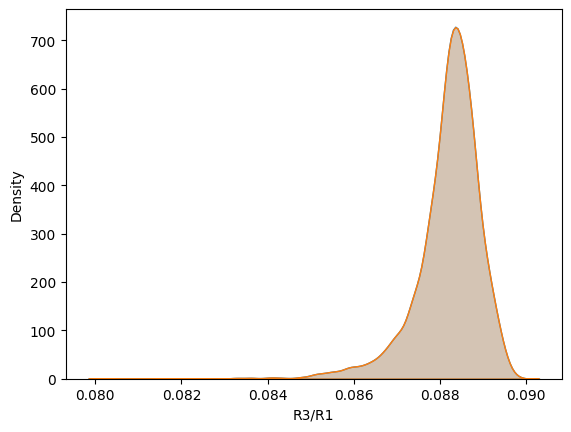

In [24]:
sns.kdeplot(data.iloc[:,9], shade=True)
sns.kdeplot(data.iloc[:,10], shade=True)

### 1.7: 该数据有部分远超2个标准差，是否会对训练造成严重影响

<AxesSubplot:xlabel='vv/[(v+)-(v-)]', ylabel='Density'>

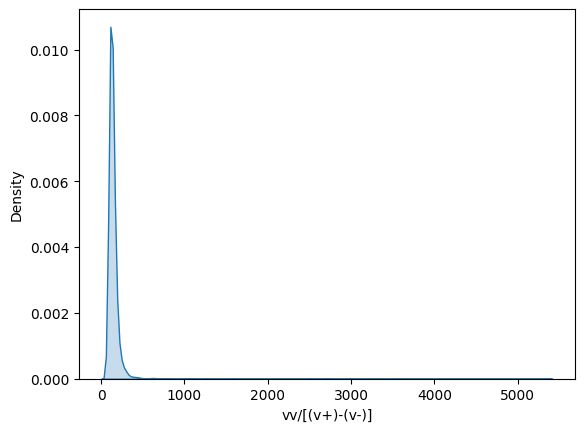

In [25]:
sns.kdeplot(data.iloc[:,11], shade=True)

### 1.8: Polarity

<AxesSubplot:xlabel='polarity', ylabel='Density'>

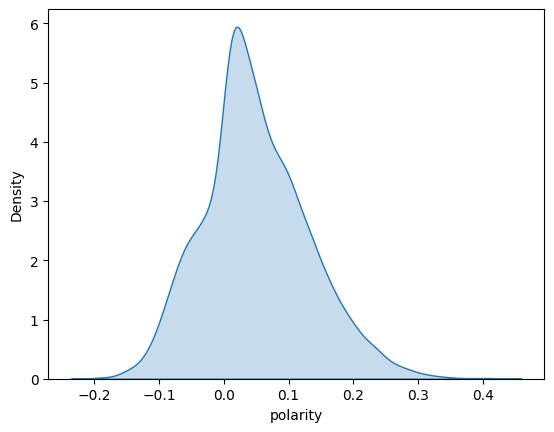

In [26]:
sns.kdeplot(data.iloc[:,12], shade=True)

# 2. Train + Validate, 获得 RMSE

In [16]:
data = pd.read_csv("data.csv")
shuffled_data = shuffle(data).reset_index(drop=True)
shuffled_data.tail()

,no.,v+,v-,vv,R1,R2,R3,I3(nA),R2/R1,R3/R1,R3/R2,vv/[(v+)-(v-)],polarity
7315,1255,0.377933,0.374198,0.398766,29110174.78,29110174.78,2566679.604,45.456911,1.00000,0.088171,0.088171,106.752682,0.106166
7316,2750,0.382100,0.378956,0.400478,25353262.24,25353262.24,2262954.059,50.240034,1.00000,0.089257,0.089257,127.359737,0.003972
7317,1519,0.379187,0.374617,0.394577,33342474.66,33342474.66,2924684.147,39.770947,1.00000,0.087716,0.087716,86.332870,0.186959
7318,4698,0.389804,0.386936,0.385304,26245849.43,26245849.43,2290358.119,52.086618,1.00000,0.087266,0.087266,134.343056,0.002182
7319,1498,0.379570,0.376920,0.393570,26532950.77,26536763.30,2356375.880,49.937110,1.00014,0.088810,0.088800,148.514070,-0.012900


In [17]:
testset = shuffled_data.loc[0:1463].reset_index(drop=True)
train_valid = shuffled_data.loc[1464:].reset_index(drop=True)
#1098/1464
testset

,no.,v+,v-,vv,R1,R2,R3,I3(nA),R2/R1,R3/R1,R3/R2,vv/[(v+)-(v-)],polarity
0,3624,0.359104,0.353576,0.420228,33292105.07,33292105.07,2923658.887,37.218106,1.00000,0.087818,0.087818,76.025489,0.234370
1,2458,0.380960,0.377160,0.394230,26543013.66,26534844.14,2341588.472,48.946280,0.99969,0.088220,0.088250,103.818250,-0.094910
2,2852,0.387801,0.384660,0.385440,28730498.81,28730498.81,2511568.025,47.667604,1.00000,0.087418,0.087418,122.700158,0.084381
3,3853,0.355376,0.351437,0.425604,28554797.33,28554797.33,2532683.285,43.048279,1.00000,0.088696,0.088696,108.027963,0.190776
4,1023,0.362957,0.358445,0.416310,29936305.39,29936305.39,2620681.761,42.375073,1.00000,0.087542,0.087542,92.266737,0.145497
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,1662,0.371450,0.367004,0.407884,31610622.78,31610622.78,2769276.124,40.956366,1.00000,0.087606,0.087606,91.746205,0.177891
1460,1060,0.374830,0.371880,0.395810,26535975.19,26539586.78,2347913.932,47.375550,1.00014,0.088480,0.088470,134.092580,-0.093680
1461,439,0.402701,0.401384,0.370933,21958894.00,21958894.00,1951380.036,63.760085,1.00000,0.088865,0.088865,281.649769,0.094420
1462,2781,0.414955,0.414510,0.356707,20202422.74,20202422.74,1793885.837,70.617522,1.00000,0.088796,0.088796,800.749038,0.206210


## 各个模型的 RMSE

### 1. Linear Regression

In [24]:
linear()

0.06826978214098793

### 2. Ridge Regression

In [25]:
ridge()

0.07122638495203079

### 3. Support Vector Regression

In [26]:
svr()

poly 0.01
0.07717192912810736
poly 0.1
0.07643946673354118
rbf 0.01
0.057186866579573815


0.057186866579573815

### 4. Decision Tree

In [27]:
decision_tree()

['friedman_mse', 'best', 'auto']


0.04048174017461474

### 5. Polynomial Regression

In [28]:
poly()

[4, True, True]


0.047307665673018015

### MLP

In [29]:
mlp()

Epoch 1/2
162/162 [==============================] - 2s 3ms/step - loss: 0.0213 - val_loss: 0.0067
Epoch 2/2
46/46 [==============================] - 0s 868us/step
Epoch 1/2
162/162 [==============================] - 1s 3ms/step - loss: 0.0842 - val_loss: 0.0080
Epoch 2/2
46/46 [==============================] - 0s 894us/step
Epoch 1/2
162/162 [==============================] - 1s 3ms/step - loss: 0.0143 - val_loss: 0.0068
Epoch 2/2
46/46 [==============================] - 0s 848us/step
Epoch 1/2
162/162 [==============================] - 1s 3ms/step - loss: 0.0083 - val_loss: 0.0068
Epoch 2/2
46/46 [==============================] - 0s 909us/step
Epoch 1/2
162/162 [==============================] - 1s 3ms/step - loss: 0.0173 - val_loss: 0.0072
Epoch 2/2
46/46 [==============================] - 0s 885us/step


0.08507793686202722

# 3. 各模型的 implementation

In [13]:
# 线性回归
def linear():
    total_error = 0
    kf = KFold(n_splits=5)
    
    for train, test in kf.split(shuffled_data):
        train_data = shuffled_data.loc[train]
        validate_data = shuffled_data.loc[test]
        y_train = train_data['polarity']
        x_train = train_data.iloc[:, 1:12]
        y_v = validate_data['polarity']
        x_v = validate_data.iloc[:, 1:12]
        y_v_numpy = y_v.to_numpy()
        
        
        lr = LinearRegression()
        lr.fit(x_train, y_train)
        predicted = lr.predict(x_v)
        
        total_error = total_error + rmse(predicted, y_v_numpy)
        pass
    
    return total_error/5

In [14]:
def ridge():
    kf = KFold(n_splits=5)

    total = 0

    for train, test in kf.split(shuffled_data):
        train_data = shuffled_data.loc[train]
        validate_data = shuffled_data.loc[test]
        y_train = train_data['polarity']
        x_train = train_data.iloc[:, 1:12]
        y_v = validate_data['polarity']
        x_v = validate_data.iloc[:, 1:12]
        y_v_numpy = y_v.to_numpy()

        ridge = Ridge()
        ridge.fit(x_train, y_train)
        total = total + rmse(ridge.predict(x_v), y_v)
        
    return total/5

In [15]:
# SVR
def svr():
    least_rmse = 1000000000
    kf = KFold(n_splits=5)
    # 'linear', 'sigmoid' too slow
    # 'precomputed' must be a square matrix
    for kr in ['poly', 'rbf']:
        for eps in [0.01,0.1, 1, 10]:
            total = 0
            for train, test in kf.split(shuffled_data):
                train_data = shuffled_data.loc[train]
                validate_data = shuffled_data.loc[test]
                y_train = train_data['polarity']
                x_train = train_data.iloc[:, 1:12]
                y_v = validate_data['polarity']
                x_v = validate_data.iloc[:, 1:12]
                y_v_numpy = y_v.to_numpy()


                svr = SVR (kernel = kr, epsilon = eps)
                svr.fit(x_train, y_train)
                svr_predicted = svr.predict(x_v)
                total += rmse(svr_predicted, y_v)
                pass
            if total/5 < least_rmse:
                print (kr, eps)
                print (total/5)
                least_rmse = total/5
                pass
    return least_rmse

In [16]:
# 决策树
def decision_tree():    
    kf = KFold(n_splits=5)
    # grid search
    least_rmse = 1000000000
    
    for cri in ['squared_error', 'friedman_mse', 'absolute_error']:
        for sp in ['best', 'random']:
            for max_feat in ['auto', 'sqrt', 'log2', None]:
                
                total = 0
                # cross validation
                for train, test in kf.split(shuffled_data):
                    train_data = shuffled_data.loc[train]
                    validate_data = shuffled_data.loc[test]
                    y_train = train_data['polarity']
                    x_train = train_data.iloc[:, 1:12]
                    y_v = validate_data['polarity']
                    x_v = validate_data.iloc[:, 1:12]
                    y_v_numpy = y_v.to_numpy()
                
                    decision = DecisionTreeRegressor(criterion = cri, splitter=sp, max_features = max_feat)
                    decision.fit(x_train, y_train)
                    result = decision.predict(x_v)
                    total = total + rmse(result, y_v)
                    pass
                
                
                if total/5 < least_rmse:
                    least_rmse = total/5
                    best_combination = [cri, sp, max_feat]
       

    print (best_combination)
    return least_rmse

In [17]:
def poly ():
    least_rmse = 1000000000
    kf = KFold(n_splits=5)
    for d in [2,3,4]:
        for interaction in [True, False]:
            for bias in [True, False]:
                total = 0
                
                # cross validation
                for train, test in kf.split(shuffled_data):
                    train_data = shuffled_data.loc[train]
                    validate_data = shuffled_data.loc[test]
                    y_train = train_data['polarity']
                    x_train = train_data.iloc[:, 1:12]
                    y_v = validate_data['polarity']
                    x_v = validate_data.iloc[:, 1:12]
                    y_v_numpy = y_v.to_numpy()
                
    
                    lr = LinearRegression()
                    quadratic = PolynomialFeatures(degree=d, interaction_only=interaction, include_bias=bias)
                    X_train_quad = quadratic.fit_transform(x_train)
                    lr.fit(X_train_quad, y_train)
                    total = total + rmse(y_v, lr.predict(quadratic.fit_transform(x_v)))
                    pass
                
                if total/5 < least_rmse:
                    least_rmse = total/5
                    best_combination = [d, interaction, bias]
                    pass
                    
    print (best_combination)    
    return least_rmse

In [18]:
def MLP(x_train,y_train,x_v):
    
    size, features = x_train.shape
    
    inputs = tf.keras.Input(shape=(features, ))
    hidden = tf.keras.layers.Dense(64, activation='tanh')(inputs)
    #hidden = tf.keras.layers.Dense(64, activation='relu')(hidden)
    outputs = tf.keras.layers.Dense(1, activation='linear')(hidden)

    tf_model = tf.keras.Model(inputs, outputs)
    tf_model.compile(
        optimizer = 'adam',
        loss = 'mse'
    )

    history = tf_model.fit(
        x_train,
        y_train,
        validation_split=0.12,
        batch_size=32,
        epochs=2
    )
    result = tf_model.predict(x_v)
    return result

In [19]:
def mlp():
    least_rmse = 1000000000
    kf = KFold(n_splits=5)
    #for d in [2,3,4]:
    #    for interaction in [True, False]:
    #        for bias in [True, False]:
    total = 0
                
                # cross validation
    for train, test in kf.split(shuffled_data):
        train_data = shuffled_data.loc[train]
        validate_data = shuffled_data.loc[test]
        y_train = train_data['polarity']
        x_train = train_data.iloc[:, 1:12]
        y_v = validate_data['polarity']
        x_v = validate_data.iloc[:, 1:12]
        y_v_numpy = y_v.to_numpy()


       
        total = total + rmse(y_v, MLP(x_train,y_train,x_v)[:,0])
        pass

    if total/5 < least_rmse:
        least_rmse = total/5
        #best_combination = [d, interaction, bias]
        pass
                    
    #print (MLP(x_train,y_train,x_v)[:,0])    
    return least_rmse

In [20]:
from sklearn.neural_network import MLPRegressor
def newmlp():
    least_rmse = 1000000000
    kf = KFold(n_splits=5)
    for hidden in [(25)]:#(10),(15),(20),(25),(30),多层效果不佳
        for act in ['logistic','tanh']:#'identity','relu'不好
            for sol in ['lbfgs','adam']:#,'adam'
                for alp in [0.0001]:#0.0001,0.001,0.01,0.1
                    #for lr in ['constant','invscaling','adaptive']:
                        for mi in [10]:#1,10,100,200
                                total = 0
                                # cross validation
                                for train, test in kf.split(train_valid):
                                    train_data = train_valid.loc[train]
                                    validate_data = train_valid.loc[test]
                                    y_train = train_data['polarity']
                                    x_train = train_data.iloc[:, 1:12]
                                    y_v = validate_data['polarity']
                                    x_v = validate_data.iloc[:, 1:12]
                                    y_v_numpy = y_v.to_numpy()

                                    mlpr = MLPRegressor(hidden_layer_sizes=hidden, ## 隐藏层的神经元个数
                                    activation=act, 
                                    solver=sol, 
                                    alpha=alp,   ## L2惩罚参数
                                    max_iter=mi, 
                                    #learning_rate = lr,
                                    random_state=123,
                                    early_stopping=True, ## 是否提前停止训练
                                    #validation_fraction=0.2, ## 20%作为验证集
                                    #                    tol=1e-8,
                                    )
                                    ## 拟合训练数据集
                                    mlpr.fit(x_train,y_train)
                                    result = mlpr.predict(x_v)
                                    total = total + rmse(result, y_v)
                                    pass


                                if total/5 < least_rmse:
                                    least_rmse = total/5
                                    best_combination = [hidden, act, sol,alp,mi]


    print (best_combination)
    mlpr = MLPRegressor(hidden_layer_sizes=best_combination[0], ## 隐藏层的神经元个数
                    activation=best_combination[1], 
                    solver=best_combination[2], 
                    alpha=best_combination[3],   ## L2惩罚参数
                    max_iter=best_combination[4], 
                    #learning_rate = best_combination[4],
                    random_state=123,
                    verbose = True,
                    early_stopping=True, ## 是否提前停止训练
                    #validation_fraction=0.2, ## 20%作为验证集
                    #                    tol=1e-8,
                    )
    x_test = testset.iloc[:, 1:12]
    y_test = testset['polarity']
    x_train_valid = train_valid.iloc[:, 1:12]
    y_train_valid = train_valid['polarity']
    mlpr.fit(x_train_valid,y_train_valid)
    result = mlpr.predict(x_test)
    print("test prediction result rmse: %f" %rmse(result,y_test))
    
    return least_rmse


## 定义含有4个隐藏层的MLP网络
#mlpr = MLPRegressor(hidden_layer_sizes=(64,64), ## 隐藏层的神经元个数
#                    activation='tanh', 
#                    solver='adam', 
#                    alpha=0.0001,   ## L2惩罚参数
#                    max_iter=20, 
#                    random_state=123,
#                    early_stopping=True, ## 是否提前停止训练
#                    validation_fraction=0.2, ## 20%作为验证集
#                    tol=1e-8,
#                   )

## 拟合训练数据集
#mlpr.fit(x_train,y_train)
#result = mlpr.predict(x_v)
#print(rmse(result, y_v))
#result2 = mlpr.predict(x_train)
#print(rmse(result2, y_train))
## 可视化损失函数
#plt.figure()
#plt.plot(mlpr.loss_curve_)
#plt.xlabel("iters")
#plt.ylabel(mlpr.loss)
#plt.show()


In [21]:
newmlp()

[25, 'logistic', 'lbfgs', 0.0001, 10]
test prediction result rmse: 0.078601


0.08240427606785358

In [22]:
from sklearn.neural_network import MLPRegressor
def mlp_sgd():
    least_rmse = 1000000000
    kf = KFold(n_splits=5)
    for hidden in [(25),(25,25),(25,25,25)]:#(10),(15),(20),(25),(30)
        for act in ['logistic']:#'identity','relu','tanh'
            for sol in ['sgd']:#,'adam'
                for alp in [0.0001]:
                    for lr in ['constant','invscaling','adaptive']:
                        for powt in [0.5]:
                            for mi in [1000]:#1,10,100,200,200,500
                                for mom in [0.95]:#0.85,0.9,
                                    total = 0
                                    # cross validation
                                    for train, test in kf.split(train_valid):
                                        train_data = train_valid.loc[train]
                                        validate_data = train_valid.loc[test]
                                        y_train = train_data['polarity']
                                        x_train = train_data.iloc[:, 1:12]
                                        y_v = validate_data['polarity']
                                        x_v = validate_data.iloc[:, 1:12]
                                        y_v_numpy = y_v.to_numpy()

                                        mlpr = MLPRegressor(hidden_layer_sizes=hidden, ## 隐藏层的神经元个数
                                        activation=act, 
                                        solver=sol, 
                                        alpha=alp,   ## L2惩罚参数
                                        learning_rate = lr,
                                        power_t = powt,
                                        max_iter=mi, 
                                        momentum = mom,
                                        random_state=123,
                                        early_stopping=True, ## 是否提前停止训练
                                        #validation_fraction=0.2, ## 20%作为验证集
                                        #                    tol=1e-8,
                                        )
                                        ## 拟合训练数据集
                                        mlpr.fit(x_train,y_train)
                                        result = mlpr.predict(x_v)
                                        total = total + rmse(result, y_v)
                                        pass


                                    if total/5 < least_rmse:
                                        least_rmse = total/5
                                        best_combination = [hidden, act, sol,alp,lr,powt,mi,mom]


    print (best_combination)
    mlpr = MLPRegressor(hidden_layer_sizes=best_combination[0], ## 隐藏层的神经元个数
                    activation=best_combination[1], 
                    solver=best_combination[2], 
                    alpha=best_combination[3],   ## L2惩罚参数
                    learning_rate = best_combination[4],
                    power_t = best_combination[5],
                    max_iter=best_combination[6], 
                    momentum = best_combination[7],
                    random_state=123,
                    early_stopping=True, ## 是否提前停止训练
                    #validation_fraction=0.2, ## 20%作为验证集
                    #                    tol=1e-8,
                    )
    x_test = testset.iloc[:, 1:12]
    y_test = testset['polarity']
    x_train_valid = train_valid.iloc[:, 1:12]
    y_train_valid = train_valid['polarity']
    mlpr.fit(x_train_valid,y_train_valid)
    result = mlpr.predict(x_test)
    print("test prediction result rmse: %f" %rmse(result,y_test))
    
    return least_rmse

In [30]:
def lasso():
    total_error = 0
    kf = KFold(n_splits=5)
    
    for train, test in kf.split(shuffled_data):
        train_data = shuffled_data.loc[train]
        validate_data = shuffled_data.loc[test]
        y_train = train_data['polarity']
        x_train = train_data.iloc[:, 1:12]
        y_v = validate_data['polarity']
        x_v = validate_data.iloc[:, 1:12]
        y_v_numpy = y_v.to_numpy()
        
        
        lf = Lasso()
        lf.fit(x_train, y_train)
        predicted = lf.predict(x_v)
        
        total_error = total_error + rmse(predicted, y_v_numpy)
        pass
    
    return total_error/5

In [31]:
lasso()

0.07611872506391255

In [41]:
def ada(deleted_column):
    total_error = 0
    kf = KFold(n_splits=5)
    DTR = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
    for train, test in kf.split(train_valid):
        train_data = train_valid.loc[train]
        validate_data = train_valid.loc[test]
        y_train = train_data['polarity']
        x_train = train_data.drop(train_data.iloc[:, [0, deleted_column, 12]], axis = 1)
        y_v = validate_data['polarity']
        x_v = validate_data.drop(validate_data.iloc[:,[0, deleted_column, 12]], axis = 1)
        y_v_numpy = y_v.to_numpy()
        
        
        lf = AdaBoostRegressor(base_estimator = DTR)
        lf.fit(x_train, y_train)
        predicted = lf.predict(x_v)
        
        total_error = total_error + rmse(predicted, y_v_numpy)
        pass
    
    return total_error/5

In [42]:
for column in range(1, 12):
    print('adaboost validation rmse with ',shuffled_data.columns[column],'deleted is', ada(column))

adaboost validation rmse with  v+   deleted 0.02990630450455929
adaboost validation rmse with  v-   deleted 0.03001385598058647
adaboost validation rmse with  vv   deleted 0.03071270363962969
adaboost validation rmse with  R1   deleted 0.029825021232185212
adaboost validation rmse with  R2   deleted 0.02997276244817998
adaboost validation rmse with  R3   deleted 0.029868704201726316
adaboost validation rmse with  I3(nA)  deleted 0.03136566361869508
adaboost validation rmse with  R2/R1  deleted 0.02976611800785616
adaboost validation rmse with  R3/R1  deleted 0.029900403599535007
adaboost validation rmse with  R3/R2  deleted 0.02983409688399131
adaboost validation rmse with  vv/[(v+)-(v-)]  deleted 0.035394658133010466


In [45]:
def adatest(deleted_column):
    total_error = 0
    kf = KFold(n_splits=5)
    DTR = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
    y_train = shuffled_data['polarity']
    x_train = shuffled_data.drop(shuffled_data.iloc[:, [0, deleted_column, 12]], axis = 1)

    lf = AdaBoostRegressor(base_estimator = DTR)
    lf.fit(x_train, y_train)
    pass
    y_test = testset['polarity']
    x_test = testset.drop(testset.iloc[:, [0, deleted_column, 12]],axis = 1)
    test_predicted = lf.predict(x_test)
    err = rmse(test_predicted, y_test.to_numpy())
    return err

In [46]:
for column in range(1, 12):
    print('adaboost test rmse with ',shuffled_data.columns[column],'deleted is', adatest(column))

adaboost test rmse with  v+  deleted is 0.0015439050435405496
adaboost test rmse with  v-  deleted is 0.0015056004511752896
adaboost test rmse with  vv  deleted is 0.0014767729531621498
adaboost test rmse with  R1  deleted is 0.0014098444845543835
adaboost test rmse with  R2  deleted is 0.0014736763473625937
adaboost test rmse with  R3  deleted is 0.0014009627151967982
adaboost test rmse with  I3(nA) deleted is 0.0013565305523077107
adaboost test rmse with  R2/R1 deleted is 0.001351393739669341
adaboost test rmse with  R3/R1 deleted is 0.0014240869397694291
adaboost test rmse with  R3/R2 deleted is 0.0013715689440087942
adaboost test rmse with  vv/[(v+)-(v-)] deleted is 0.001729690981671727


In [23]:
mlp_sgd()

[(25, 25, 25), 'logistic', 'sgd', 0.0001, 'invscaling', 0.5, 1000, 0.95]
test prediction result rmse: 0.080344


0.08254381833179911